In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
#!pip install tensorflow==2.12.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, auc)


In [3]:
Data_Path = 'D:\\Masrafe\\Coding\\Git_Hub_code\\ml_project\\SOC_Prediction\\Dataset\\Lithium-Ion Battery Drive Cycle Dataset\\2_preprocessed'

In [4]:
# Collect data from all CSVs
all_data = []
for folder in os.listdir(Data_Path):
    folder_path = os.path.join(Data_Path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.csv'):
                df = pd.read_csv(os.path.join(folder_path, file))
                all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True)


In [5]:
# Drop NaNs and outliers (if any)
df_all = df_all.dropna()

# Define features and target
features = ['Voltage', 'Current', 'Temperature']
X = df_all[features]
y = df_all['SOC']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Prediction and Evaluation
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


XGBoost RMSE: 0.01429226211328008
XGBoost R²: 0.9970889481589155


In [7]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

# Print in your requested style
print(f"Test R²: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")

Test R²: 0.997
Test RMSE: 0.014
Test MAE: 0.010


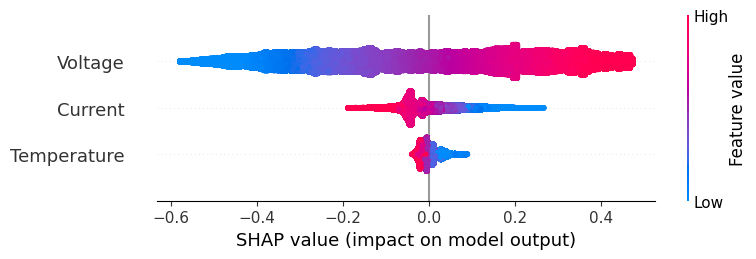

In [8]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)